In [76]:
import numpy as np
import pandas as pd
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

# EDA

In [5]:
credit = pd.read_csv('creditcard.csv')# read csv
credit.describe() # verify the read

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
credit.head()# first 5 entries

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit.tail()#last 5 entries

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [101]:
credit.describe()#Statistical measure for orignial CSV file

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
credit.isnull().sum()#checking for missing entries

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### no missing enteries :)

In [9]:
print ('Not Fraud % ',round(credit['Class'].value_counts()[0]/len(credit)*100,2))#looking closer at class column
print ()
print (round(credit.Amount[credit.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(credit['Class'].value_counts()[1]/len(credit)*100,2))
print ()
print (round(credit.Amount[credit.Class == 1].describe(),2))

Not Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


In [31]:
# separating the data for analysis
legit = credit[credit.Class == 0]
fraud = credit[credit.Class == 1]

In [33]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [35]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### due to the large difference between the amount of fraud cases vs non fraud cases we can already tell that this database is unbalnced and needs to be balamced for a more accurate prediction 

In [32]:
# compare the values for both transactions
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [36]:
legit_sample = legit.sample(n=492)   # creating a sample size of 492 to match the amount of fraud cases for balance

In [37]:
new_credit = pd.concat([legit_sample, fraud], axis=0) # creating new data set with new legit sample size

In [55]:
new_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183189,125692.0,-0.519509,1.043675,-2.104983,-1.598825,2.336409,4.323663,-1.873634,-4.515794,-0.915668,...,-2.687975,0.139547,0.003034,0.685967,0.750809,-0.018634,0.069004,0.260260,80.00,0
4291,3757.0,1.196322,-1.022632,-1.034102,-1.530126,1.353603,3.312939,-1.029550,0.682809,0.347608,...,-0.213804,-0.954272,-0.012297,0.925467,0.318062,-0.519700,-0.039983,0.033919,148.09,0
266513,162365.0,-1.052998,0.425369,-1.187392,-0.508878,2.061990,0.950960,0.343668,0.670876,0.312413,...,0.276621,1.278619,0.286261,-2.483598,-0.550057,0.036548,0.187174,-0.069097,8.18,0
247024,153429.0,-0.153069,0.264408,0.437083,-0.892949,0.632110,-1.036751,0.642577,0.044679,-0.088858,...,-0.190509,-0.727489,0.077327,-0.042488,-0.239437,0.071398,-0.124617,-0.079165,1.98,0
2538,2099.0,-0.643533,0.856521,1.108578,-2.064887,0.157108,-1.234863,1.098789,-0.318145,0.986645,...,0.081307,0.712932,-0.215117,0.403584,0.010430,-0.825729,0.361077,0.046424,1.00,0


In [40]:
new_credit['Class'].value_counts()# verifying 

0    492
1    492
Name: Class, dtype: int64

In [42]:
new_credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94406.296748,0.053307,0.004518,0.055460,0.092021,-0.045755,0.025570,0.013633,-0.174654,0.036992,...,0.034224,-0.033461,0.011699,0.003618,0.015231,-0.002463,-0.026328,-0.008663,0.020817,99.321362
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Modeling

In [43]:
X = new_credit.drop(columns='Class', axis=1) # dropping target variable
Y = new_credit['Class']

In [44]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
183189  125692.0 -0.519509  1.043675 -2.104983 -1.598825  2.336409  4.323663   
4291      3757.0  1.196322 -1.022632 -1.034102 -1.530126  1.353603  3.312939   
266513  162365.0 -1.052998  0.425369 -1.187392 -0.508878  2.061990  0.950960   
247024  153429.0 -0.153069  0.264408  0.437083 -0.892949  0.632110 -1.036751   
2538      2099.0 -0.643533  0.856521  1.108578 -2.064887  0.157108 -1.234863   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [45]:
print(Y)

183189    0
4291      0
266513    0
247024    0
2538      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) #splitting into test and training sets

In [50]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
# fitting the model with data  - TRAIN the model
logreg.fit(X_train,Y_train)


LogisticRegression(max_iter=10000)

In [102]:
y_pred=logreg.predict(X_test)

In [103]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))


Accuracy of logistic regression classifier on test set: 0.95


In [96]:
#split dataset in features and target variable
feature_cols = ['Time', 'Amount']
X = new_credit[feature_cols] # Features
y = new_credit["Class"] # Target variable

In [104]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, Y_test)
print(cnf_matrix)
tpos = cnf_matrix[0][0]
fneg = cnf_matrix[1][0]
fpos = cnf_matrix[0][1]
tneg = cnf_matrix[1][1]
print("True Positive Cases are",tpos) #How many non-fraud cases were identified as non-fraud cases - GOOD
print("True Negative Cases are",tneg) #How many Fraud cases were identified as Fraud cases - GOOD
print("False Positive Cases are",fpos) #How many Fraud cases were identified as non-fraud cases - BAD | (type 1 error)
print("False Negative Cases are",fneg) #How many non-fraud cases were identified as Fraud cases - BAD | (type 2 error)

[[98  9]
 [ 1 89]]
True Positive Cases are 98
True Negative Cases are 89
False Positive Cases are 9
False Negative Cases are 1


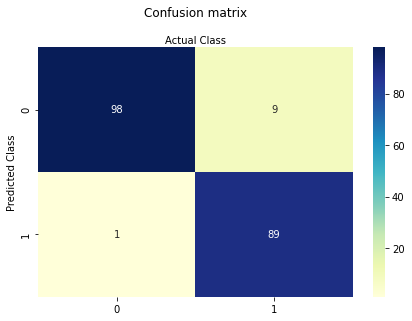

In [105]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class');

In [106]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("F1-score:",metrics.f1_score(Y_test, y_pred))


Accuracy: 0.949238578680203
Precision: 0.9888888888888889
Recall: 0.9081632653061225
F1-score: 0.946808510638298


In [107]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.99      0.91      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



# Video

In [108]:
https://youtu.be/n5bnqbg4oe8

SyntaxError: invalid syntax (<ipython-input-108-e6df7b7438e5>, line 1)